In [1]:
# blanket import modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint
from scipy.stats import linregress

In [2]:
# setting up paths for data
happy_cs = "../Output/happy_comb-data.csv"

In [3]:
happy_df = pd.read_csv(happy_cs)
happy_df

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
0,1,Finland,7.821,0.775,1858.00,18742.0,10.65
1,2,Denmark,7.636,0.777,1932.00,20304.0,10.13
2,3,Iceland,7.557,0.803,1326.00,19300.0,9.21
3,4,Switzerland,7.512,0.822,1932.75,25787.0,11.23
4,5,Netherlands,7.415,0.787,1662.00,19690.0,9.67
...,...,...,...,...,...,...,...
93,136,India,3.777,0.471,2517.02,1314.0,5.61
94,137,Zambia,3.760,0.306,2965.47,1045.0,4.46
95,138,Malawi,3.750,0.388,2795.87,733.0,4.08
96,139,Tanzania,3.702,0.425,3032.85,992.0,12.04


In [4]:
avg_happiness = happy_df['Happiness Score'].mean()
avg_happiness

5.7205102040816325

In [5]:
# Linear Regression Function

def linear_regression(x_axis_lreg, y_axis_lreg, x_label, y_label, line_eq_x, line_eq_y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_lreg, y_axis_lreg)
    regress_values = x_axis_lreg * slope + intercept
    line_eq = (f'y = {(round(slope,2))}x  + {(round(intercept,2))}')

    plt.scatter(x_axis_lreg, y_axis_lreg, marker = 'o', facecolor = '#20B2AA', edgecolor = 'black')
    plt.rcParams["font.family"] = "Times New Roman"
    plt.xlabel(x_label, fontsize = 12)
    plt.ylabel(y_label, fontsize =12)
    plt.title(f'Country Happiness Score vs. {y_label}', fontsize = 14)
    plt.plot(x_axis_lreg, regress_values, 'r')
    plt.annotate(line_eq, (line_eq_x, line_eq_y), fontsize = 12, color = 'red', size = 14)
    plt.grid(True)
    
    print(f'The r-square value is {rvalue**2}')
    
    plt.tight_layout()
    plt.show
    
    correlation = st.pearsonr(x_axis_lreg, y_axis_lreg)
    print(f'The correlation between Happiness and {y_label} is {(round(correlation[0],2))}.')

## Happiness by Average Income
#### Q: Are countries with higher average incomes happier?

The r-square value is 0.6983771639807141
The correlation between Happiness and Average Income is 0.84.


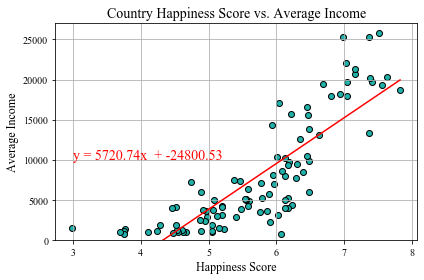

In [7]:
linear_regression(happy_df['Happiness Score'], happy_df['Average Income ($)'], 
                  'Happiness Score', 'Average Income', 3, 10000)

plt.ylim(0,27000)

plt.savefig('../Images/Happiness vs. Avg. Income Scatterplot.png')

In [8]:
avg_income = happy_df.sort_values('Average Income ($)', ascending = False)
avg_income

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
3,4,Switzerland,7.512,0.822,1932.75,25787.0,11.23
13,16,United States of America,6.977,0.628,2827.62,25332.0,9.97
6,8,Norway,7.365,0.786,1373.33,25272.0,7.14
12,15,Canada,7.025,0.783,2028.04,22042.0,8.81
9,12,Australia,7.162,0.772,2843.57,21329.0,10.36
...,...,...,...,...,...,...,...
92,135,Togo,4.112,0.360,2579.95,964.0,2.66
70,101,Mozambique,5.048,0.191,2838.00,947.0,2.69
88,123,Mali,4.479,0.311,3099.87,861.0,1.31
39,53,Uzbekistan,6.063,0.600,2823.90,752.0,2.61


In [9]:
richest_countries = avg_income.head(5)
richest_countries = pd.DataFrame({'Country' : richest_countries['Country'], 
                                  'Happiness Score' : richest_countries['Happiness Score']})
richest_countries

,Country,Happiness Score
3,Switzerland,7.512
13,United States of America,6.977
6,Norway,7.365
12,Canada,7.025
9,Australia,7.162


In [10]:
poorest_countries = avg_income.tail(5)
poorest_countries = pd.DataFrame({'Country' : poorest_countries['Country'], 
                                  'Happiness Score' : poorest_countries['Happiness Score']})
poorest_countries

,Country,Happiness Score
92,Togo,4.112
70,Mozambique,5.048
88,Mali,4.479
39,Uzbekistan,6.063
95,Malawi,3.750


In [11]:
avg_income_concat_df = pd.concat([richest_countries, poorest_countries])
avg_income_concat_df

,Country,Happiness Score
3,Switzerland,7.512
13,United States of America,6.977
6,Norway,7.365
12,Canada,7.025
9,Australia,7.162
92,Togo,4.112
70,Mozambique,5.048
88,Mali,4.479
39,Uzbekistan,6.063
95,Malawi,3.750


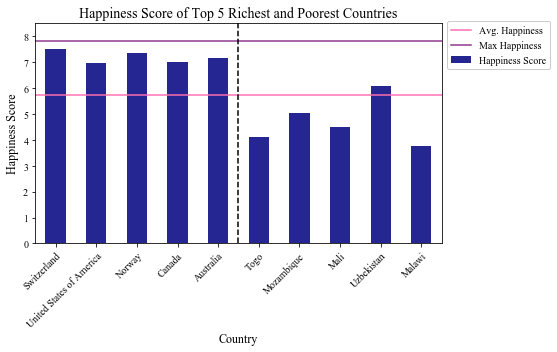

In [12]:
avg_income_bc = avg_income_concat_df.plot(kind = 'bar', color ='navy', alpha = 0.85, figsize = (8,5))

plt.rcParams["font.family"] = "Times New Roman"
plt.title('Happiness Score of Top 5 Richest and Poorest Countries', fontsize = 14)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Happiness Score', fontsize = 12)

xticks = avg_income_concat_df['Country']
avg_income_bc.set_xticklabels(xticks, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

plt.ylim(0, 8.5)

plt.axhline(y = avg_happiness, color = '#FF6EB4', label = 'Avg. Happiness')
plt.axhline(y = happy_df['Happiness Score'].max(), color = '#8E388E', label = 'Max Happiness')

plt.axvline(x = 4.5, color = 'black', linestyle = '--')

legend = plt.legend(loc = 'center right', fontsize = 10, bbox_to_anchor=(1.28, 0.9))
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 0, 1, 0))

plt.tight_layout()
plt.savefig('../Images/Happiness vs. Avg. Income- Countries Bar Chart.png')
plt.show()

## Happiness by Annual Sunshine 
#### Q: Does the weather of a country (av sunshine) influence happiness?

The r-square value is 0.2936315722812921
The correlation between Happiness and Sunshine Hours per Year is -0.54.


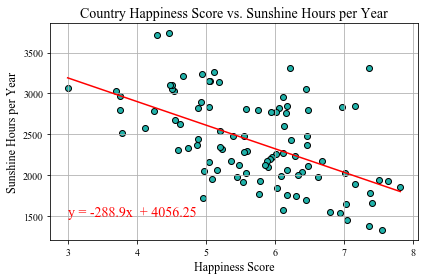

In [13]:
linear_regression(happy_df['Happiness Score'], happy_df['Sunshine Hrs per Year'], 
                  'Happiness Score', 'Sunshine Hours per Year', 3, 1500)

plt.savefig('../Images/Happiness vs. Annual Sunshine Scatterplot.png')

In [14]:
annual_sunshine = happy_df.sort_values('Sunshine Hrs per Year', ascending = False)
annual_sunshine

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
89,124,Namibia,4.459,0.354,3737.50,4023.0,3.15
90,129,Egypt,4.288,0.548,3710.68,1847.0,0.14
29,41,Cyprus,6.221,0.819,3314.10,15663.0,10.80
7,9,Israel,7.364,0.818,3311.00,13271.0,4.38
67,96,Algeria,5.122,0.643,3266.50,2996.0,0.63
...,...,...,...,...,...,...,...
15,19,Belgium,6.805,0.764,1546.00,17917.0,10.80
14,17,United Kingdom,6.943,0.750,1530.00,18133.0,11.45
10,13,Ireland,7.041,0.779,1453.00,17938.0,12.75
6,8,Norway,7.365,0.786,1373.33,25272.0,7.14


In [15]:
sunniest_countries = annual_sunshine.head()
sunniest_countries = pd.DataFrame({'Country' : sunniest_countries['Country'], 
                                  'Happiness Score' : sunniest_countries['Happiness Score']})
sunniest_countries

,Country,Happiness Score
89,Namibia,4.459
90,Egypt,4.288
29,Cyprus,6.221
7,Israel,7.364
67,Algeria,5.122


In [16]:
darkest_countries = annual_sunshine.tail()
darkest_countries = pd.DataFrame({'Country' : darkest_countries['Country'], 
                                  'Happiness Score' : darkest_countries['Happiness Score']})
darkest_countries

,Country,Happiness Score
15,Belgium,6.805
14,United Kingdom,6.943
10,Ireland,7.041
6,Norway,7.365
2,Iceland,7.557


In [17]:
sunniness_concat_df = pd.concat([sunniest_countries, darkest_countries])
sunniness_concat_df

,Country,Happiness Score
89,Namibia,4.459
90,Egypt,4.288
29,Cyprus,6.221
7,Israel,7.364
67,Algeria,5.122
15,Belgium,6.805
14,United Kingdom,6.943
10,Ireland,7.041
6,Norway,7.365
2,Iceland,7.557


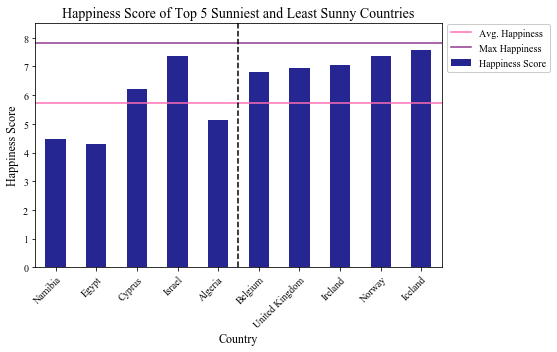

In [18]:
sunniness_bc = sunniness_concat_df.plot(kind = 'bar', color ='navy', alpha = 0.85, figsize = (8,5))

plt.rcParams["font.family"] = "Times New Roman"
plt.title('Happiness Score of Top 5 Sunniest and Least Sunny Countries', fontsize = 14)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Happiness Score', fontsize = 12)

xticks = sunniness_concat_df['Country']
sunniness_bc.set_xticklabels(xticks, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

plt.ylim(0, 8.5)

plt.axhline(y = avg_happiness, color = '#FF6EB4', label = 'Avg. Happiness')
plt.axhline(y = happy_df['Happiness Score'].max(), color = '#8E388E', label = 'Max Happiness')

plt.axvline(x = 4.5, color = 'black', linestyle = '--')

legend = plt.legend(loc = 'center right', fontsize = 10, bbox_to_anchor=(1.28, 0.9))
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 0, 1, 0))

plt.tight_layout()
plt.savefig('../Images/Happiness vs. Annual Sunshine- Countries Bar Chart.png')
plt.show()

## Happiness by Life Expectancy
#### Q: Are countries with longer life expectancies happier?

The r-square value is 0.6079805675799056
The correlation between Happiness and Life Expectancy is 0.78.


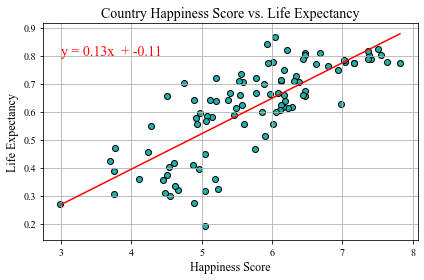

In [19]:
linear_regression(happy_df['Happiness Score'], happy_df['Healthy Life Expectancy'], 
                  'Happiness Score', 'Life Expectancy', 3, 0.8)

plt.savefig('../Images/Happiness vs. Life Expectancy Scatterplot.png')

In [20]:
life_expectancy = happy_df.sort_values('Healthy Life Expectancy', ascending = False)
life_expectancy

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
40,54,Japan,6.039,0.866,1837.12,17095.0,10.09
45,59,South Korea,5.935,0.841,2196.65,14316.0,8.45
3,4,Switzerland,7.512,0.822,1932.75,25787.0,11.23
29,41,Cyprus,6.221,0.819,3314.10,15663.0,10.80
7,9,Israel,7.364,0.818,3311.00,13271.0,4.38
...,...,...,...,...,...,...,...
94,137,Zambia,3.760,0.306,2965.47,1045.0,4.46
84,118,Nigeria,4.552,0.300,2669.08,1021.0,6.19
77,109,Guinea,4.891,0.275,2440.00,1036.0,1.09
97,144,Zimbabwe,2.995,0.270,3065.40,1429.0,4.52


In [21]:
longest_countries = life_expectancy.head()
longest_countries = pd.DataFrame({'Country' : longest_countries['Country'], 
                                  'Happiness Score' : longest_countries['Happiness Score']})
longest_countries

,Country,Happiness Score
40,Japan,6.039
45,South Korea,5.935
3,Switzerland,7.512
29,Cyprus,6.221
7,Israel,7.364


In [22]:
shortest_countries = life_expectancy.tail()
shortest_countries = pd.DataFrame({'Country' : shortest_countries['Country'], 
                                  'Happiness Score' : shortest_countries['Happiness Score']})
longest_countries

,Country,Happiness Score
40,Japan,6.039
45,South Korea,5.935
3,Switzerland,7.512
29,Cyprus,6.221
7,Israel,7.364


In [23]:
healthy_concat_df = pd.concat([longest_countries, shortest_countries])
healthy_concat_df

,Country,Happiness Score
40,Japan,6.039
45,South Korea,5.935
3,Switzerland,7.512
29,Cyprus,6.221
7,Israel,7.364
94,Zambia,3.760
84,Nigeria,4.552
77,Guinea,4.891
97,Zimbabwe,2.995
70,Mozambique,5.048


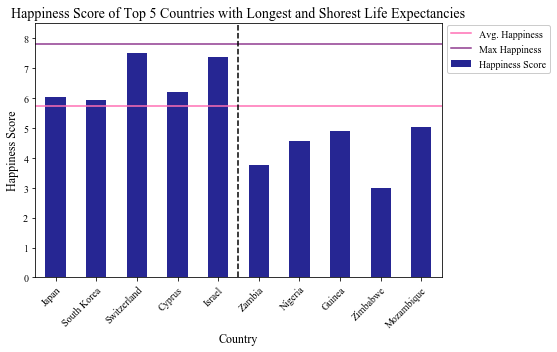

In [24]:
healthy_bc = healthy_concat_df.plot(kind = 'bar', color ='navy', alpha = 0.85, figsize = (8,5))

plt.rcParams["font.family"] = "Times New Roman"
plt.title('Happiness Score of Top 5 Countries with Longest and Shorest Life Expectancies', fontsize = 14)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Happiness Score', fontsize = 12)

xticks = healthy_concat_df['Country']
healthy_bc.set_xticklabels(xticks, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

plt.ylim(0, 8.5)

plt.axhline(y = avg_happiness, color = '#FF6EB4', label = 'Avg. Happiness')
plt.axhline(y = happy_df['Happiness Score'].max(), color = '#8E388E', label = 'Max Happiness')

plt.axvline(x = 4.5, color = 'black', linestyle = '--')

legend = plt.legend(loc = 'center right', fontsize = 10, bbox_to_anchor=(1.28, 0.9))
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 0, 1, 0))

plt.tight_layout()
plt.savefig('../Images/Happiness vs. Life Expectancy- Countries Bar Chart.png')
plt.show()

## Happiness by Alcohol Consumption
#### Q: Does Alcohol Influence happiness?

The r-square value is 0.3086030073577339
The correlation between Happiness and Alcohol Consumption (L/year) is 0.56.


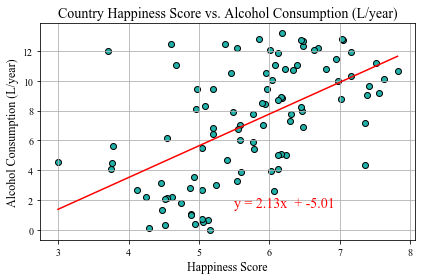

In [25]:
linear_regression(happy_df['Happiness Score'], happy_df['Alcohol Consumption (L/year)'], 
                  'Happiness Score', 'Alcohol Consumption (L/year)', 5.5, 1.5)

plt.savefig('../Images/Happiness vs. Alcohol Consumption Scatterplot.png')

In [26]:
alcohol_consumption = happy_df.sort_values('Alcohol Consumption (L/year)', ascending = False)
alcohol_consumption

,RANK,Country,Happiness Score,Healthy Life Expectancy,Sunshine Hrs per Year,Average Income ($),Alcohol Consumption (L/year)
30,42,Latvia,6.180,0.637,1754.00,9727.0,13.19
48,62,Moldova,5.857,0.597,2126.00,3590.0,12.85
11,14,Germany,7.034,0.776,1644.00,19730.0,12.79
23,34,Lithuania,6.446,0.659,1691.00,10479.0,12.78
10,13,Ireland,7.041,0.779,1453.00,17938.0,12.75
...,...,...,...,...,...,...,...
69,100,Morocco,5.060,0.565,3155.47,3721.0,0.49
75,107,Iraq,4.941,0.554,3240.80,2293.0,0.37
87,121,Pakistan,4.516,0.374,3108.52,1797.0,0.31
90,129,Egypt,4.288,0.548,3710.68,1847.0,0.14


In [27]:
most_alcohol_countries = alcohol_consumption.head()
most_alcohol_countries = pd.DataFrame({'Country' : most_alcohol_countries['Country'], 
                                       'Happiness Score' : most_alcohol_countries['Happiness Score']})
most_alcohol_countries

,Country,Happiness Score
30,Latvia,6.180
48,Moldova,5.857
11,Germany,7.034
23,Lithuania,6.446
10,Ireland,7.041


In [28]:
least_alcohol_countries = alcohol_consumption.tail()
least_alcohol_countries = pd.DataFrame({'Country' : least_alcohol_countries['Country'], 
                                       'Happiness Score' : least_alcohol_countries['Happiness Score']})
least_alcohol_countries

,Country,Happiness Score
69,Morocco,5.060
75,Iraq,4.941
87,Pakistan,4.516
90,Egypt,4.288
66,Bangladesh,5.155


In [29]:
alcohol_concat_df = pd.concat([most_alcohol_countries, least_alcohol_countries])
alcohol_concat_df

,Country,Happiness Score
30,Latvia,6.180
48,Moldova,5.857
11,Germany,7.034
23,Lithuania,6.446
10,Ireland,7.041
69,Morocco,5.060
75,Iraq,4.941
87,Pakistan,4.516
90,Egypt,4.288
66,Bangladesh,5.155


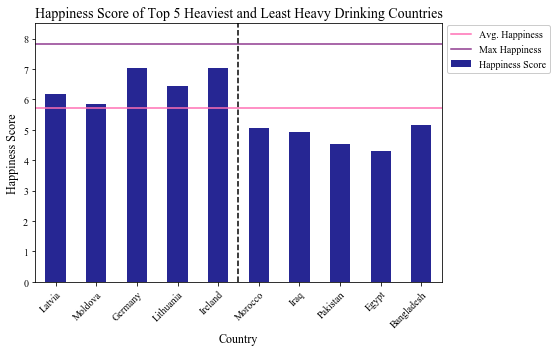

In [30]:
alcohol_bc = alcohol_concat_df.plot(kind = 'bar', color ='navy', alpha = 0.85, figsize = (8,5))

plt.rcParams["font.family"] = "Times New Roman"
plt.title('Happiness Score of Top 5 Heaviest and Least Heavy Drinking Countries', fontsize = 14)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Happiness Score', fontsize = 12)

xticks = alcohol_concat_df['Country']
alcohol_bc.set_xticklabels(xticks, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

plt.ylim(0, 8.5)

plt.axhline(y = avg_happiness, color = '#FF6EB4', label = 'Avg. Happiness')
plt.axhline(y = happy_df['Happiness Score'].max(), color = '#8E388E', label = 'Max Happiness')

plt.axvline(x = 4.5, color = 'black', linestyle = '--')

legend = plt.legend(loc = 'center right', fontsize = 10, bbox_to_anchor=(1.28, 0.9))
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 0, 1, 0))

plt.tight_layout()
plt.savefig('../Images/Happiness vs. Alcohol Consumption- Countries Bar Chart.png')
plt.show()